In [245]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#from catboost import CatBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
!pip install catboost

In [246]:
df=pd.read_csv('/train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [247]:
df.shape

(74111, 29)

In [248]:
df=df.rename(columns={'id':'hotel_id'})
df

,hotel_id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [249]:
df.tail()

,hotel_id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0
74110,3534845,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",4,1.0,Real Bed,moderate,False,...,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205,96.0,https://a0.muscache.com/im/pictures/22968537/d...,90802,1.0,2.0


In [250]:
df=df.drop(['amenities','host_has_profile_pic','first_review','last_review','host_response_rate','review_scores_rating','zipcode'],axis=1)
df.head()

,hotel_id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,thumbnail_url,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,2012-03-26,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,2017-06-19,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,https://a0.muscache.com/im/pictures/348a55fe-4...,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,2016-10-25,t,40.808110,-73.943756,The Garden Oasis,Harlem,10,https://a0.muscache.com/im/pictures/6fae5362-9...,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,...,2015-04-19,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,https://a0.muscache.com/im/pictures/72208dad-9...,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,2015-03-01,t,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,NaN,0.0,1.0


In [251]:
import pandas as pd

# Assuming your dataframe is named 'df'
# Drop the 'thumbnail_url' column
df.drop(columns=['thumbnail_url'], inplace=True)

# Check the dataframe after dropping the column
print(df.head())  # or df.info() to verify the column has been removed


   hotel_id  log_price property_type        room_type  accommodates  \
0   6901257   5.010635     Apartment  Entire home/apt             3   
1   6304928   5.129899     Apartment  Entire home/apt             7   
2   7919400   4.976734     Apartment  Entire home/apt             5   
3  13418779   6.620073         House  Entire home/apt             4   
4   3808709   4.744932     Apartment  Entire home/apt             2   

   bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
0        1.0  Real Bed              strict          True  NYC  ...   
1        1.0  Real Bed              strict          True  NYC  ...   
2        1.0  Real Bed            moderate          True  NYC  ...   
3        1.0  Real Bed            flexible          True   SF  ...   
4        1.0  Real Bed            moderate          True   DC  ...   

  host_identity_verified  host_since instant_bookable   latitude   longitude  \
0                      t  2012-03-26                f  40.696524  -73.99

In [252]:
df.isnull().sum()

hotel_id                     0
log_price                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                  200
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_identity_verified     188
host_since                 188
instant_bookable             0
latitude                     0
longitude                    0
name                         0
neighbourhood             6872
number_of_reviews            0
bedrooms                    91
beds                       131
dtype: int64

In [253]:
df.host_identity_verified.fillna(method='ffill', inplace=True)
df.neighbourhood.fillna(method='ffill', inplace=True)
df.bathrooms.fillna(method='ffill', inplace=True)
df.beds.fillna(method='ffill', inplace=True)
df['bedrooms'].fillna(df['bathrooms'].median(), inplace=True)


In [ ]:
df['host_since'].fillna(df['host_since'].mode(),inplace=True)


In [254]:
df.isnull().sum()

hotel_id                    0
log_price                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
host_identity_verified      0
host_since                188
instant_bookable            0
latitude                    0
longitude                   0
name                        0
neighbourhood               0
number_of_reviews           0
bedrooms                    0
beds                        0
dtype: int64

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hotel_id                74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  host_identity_verified  74111 non-null  object 
 12  host_since              73923 non-null  object 
 13  instant_bookable        74111 non-null  object 
 14  latitude                74111 non-null

In [256]:
df.describe()

,hotel_id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.235302,38.445958,-92.397525,20.900568,1.265467,1.710677
std,6.081735e+06,0.717394,2.153589,0.582192,3.080167,21.705322,37.828641,0.851671,1.253673
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,10.000000,18.000000


<ipython-input-257-46c98d6f3f96>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_price"])


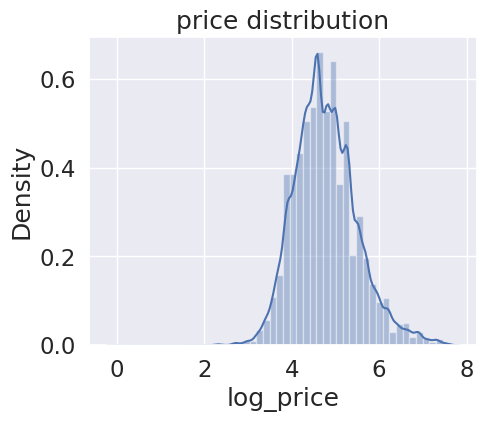

In [257]:
plt.figure(figsize = (5,4))
sns.distplot(df["log_price"])
plt.title('price distribution')
plt.show()

<Axes: xlabel='room_type', ylabel='count'>

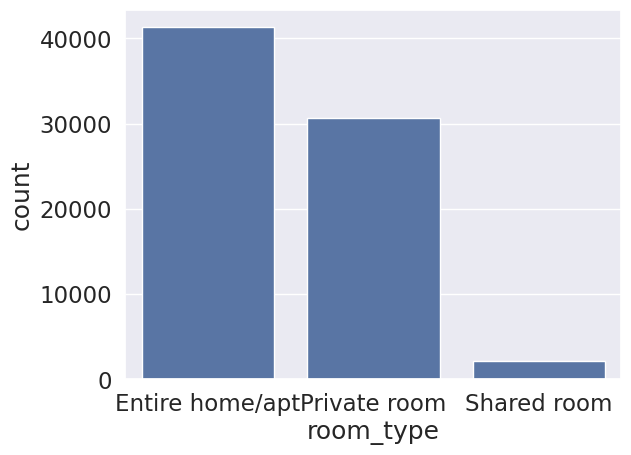

In [258]:
sns.countplot(x='room_type',data=df)

<Axes: xlabel='city', ylabel='count'>

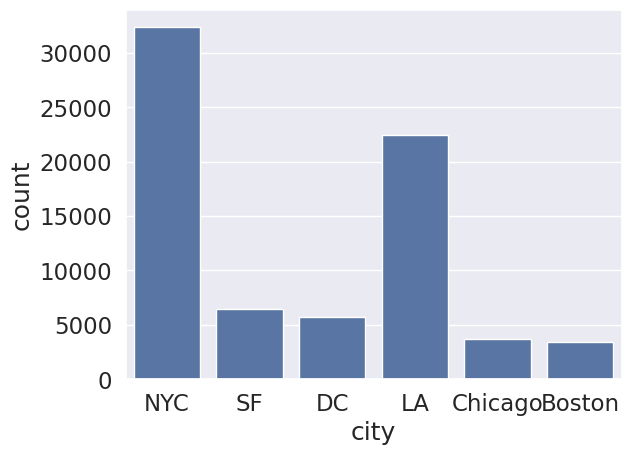

In [259]:
sns.countplot(x='city',data=df)

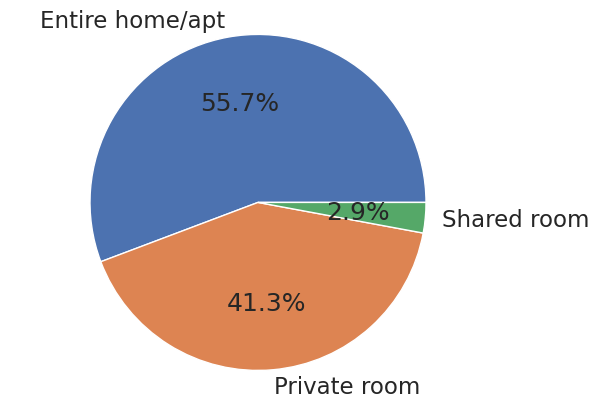

In [260]:
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

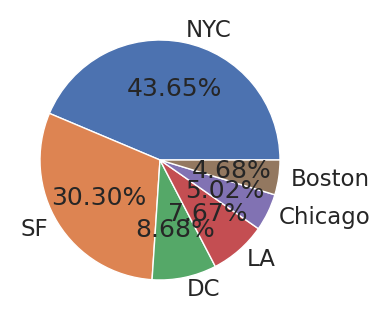

In [261]:
fig=plt.figure(figsize=(3,3))
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students=list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

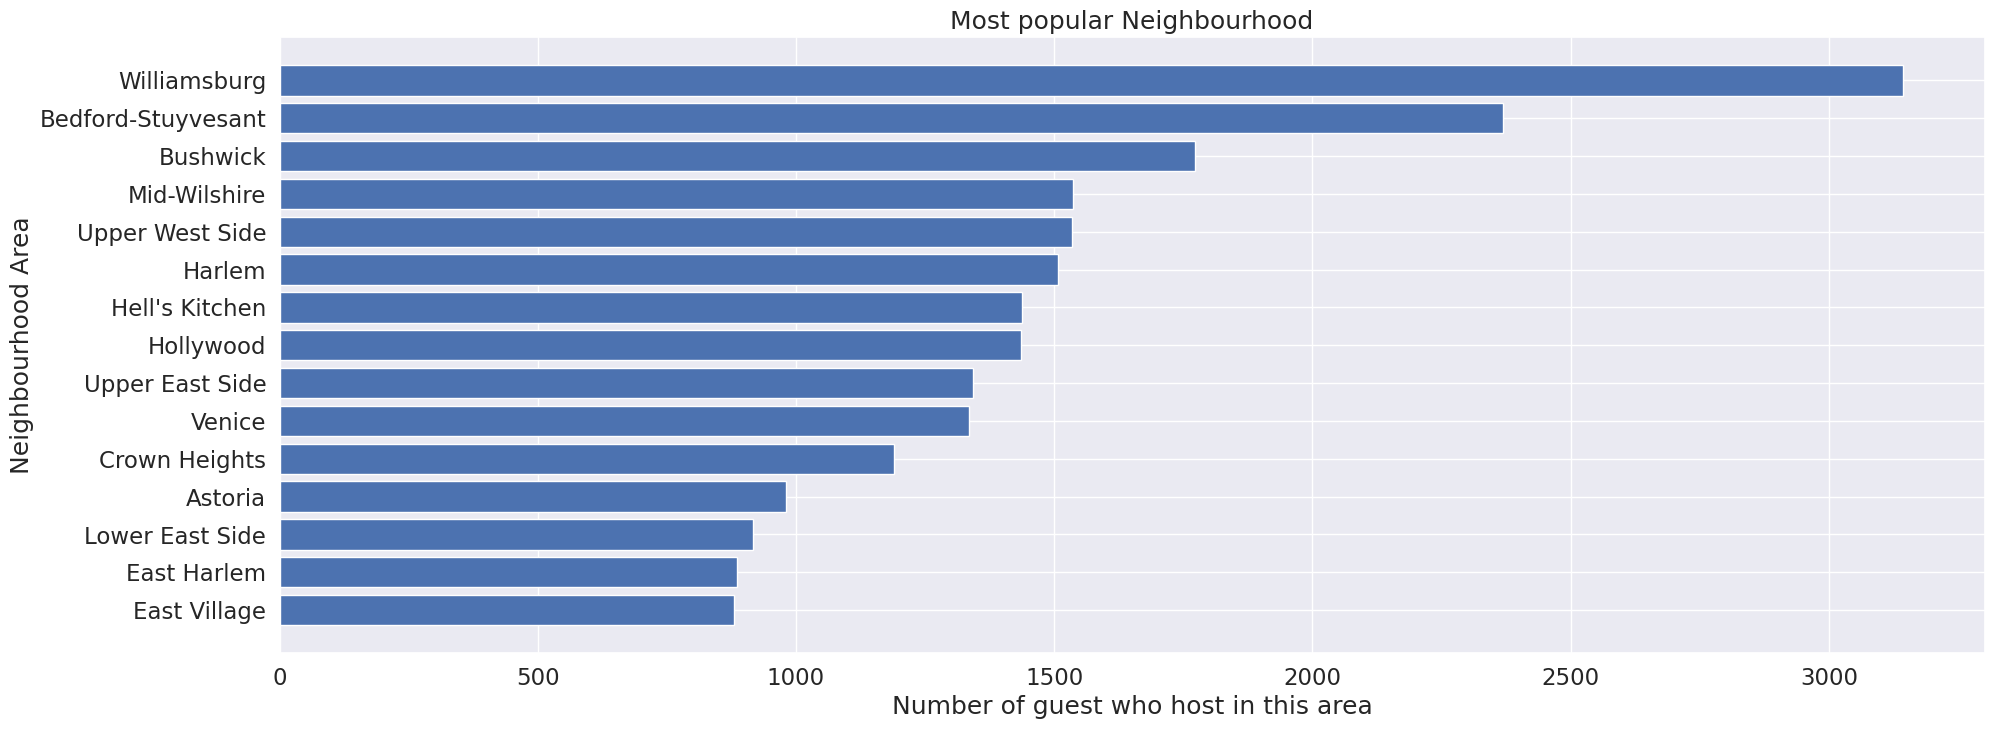

In [262]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,8))
x= list(data.index)
y= list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")
plt.barh(x,y)
plt.show()

<Axes: xlabel='cancellation_policy', ylabel='count'>

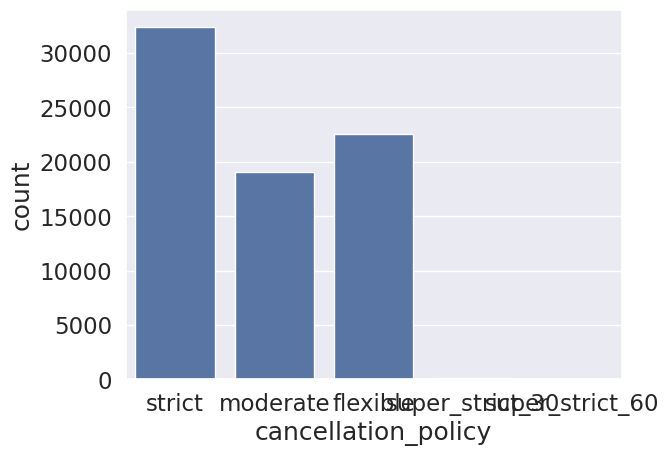

In [263]:
sns.countplot(x='cancellation_policy', data=df)

<Axes: xlabel='cleaning_fee', ylabel='count'>

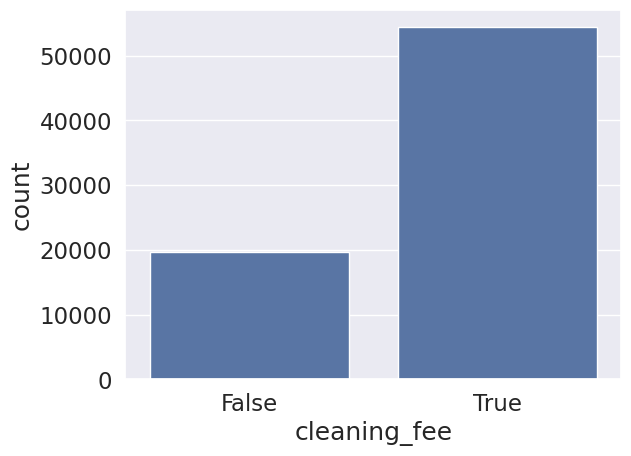

In [264]:
sns.countplot(x='cleaning_fee',data=df)

<Axes: xlabel='bed_type', ylabel='count'>

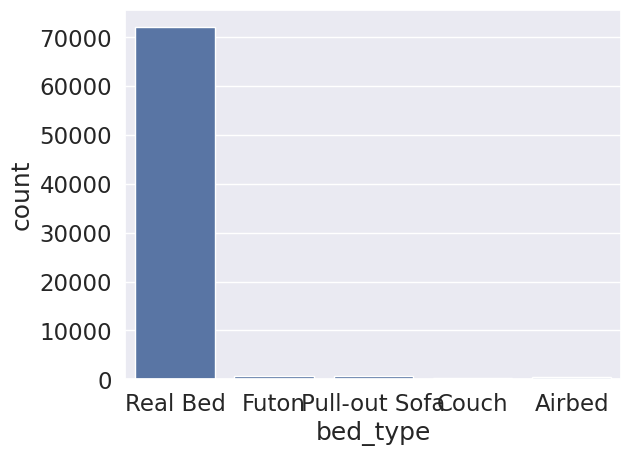

In [265]:
sns.countplot(x='bed_type',data=df)

<ipython-input-266-4a6c314e4ecc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')


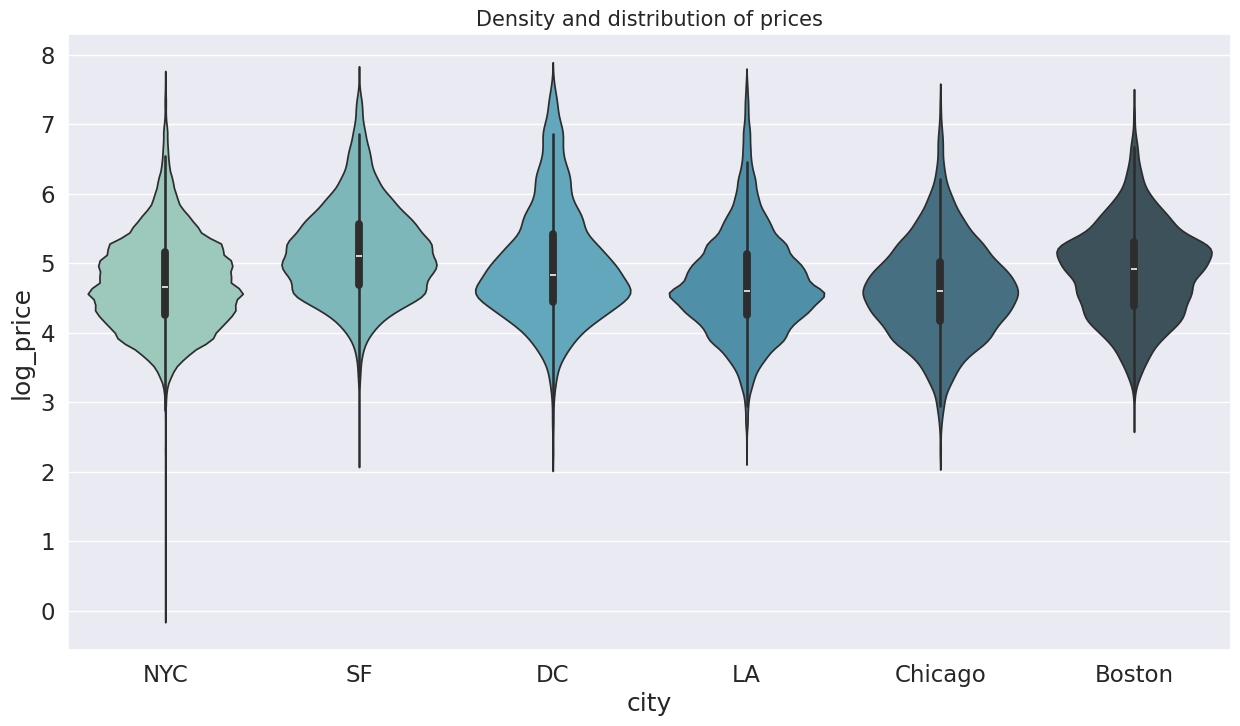

In [266]:
def plot_violinplot(h,v):
 plt.figure(figsize=(15,8))
 sns.set(font_scale=1.5)
 sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
 plt.title('Density and distribution of prices', fontsize=15)
 plt.xlabel(h)
 plt.ylabel(v)
plot_violinplot("city","log_price")

<ipython-input-266-4a6c314e4ecc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')


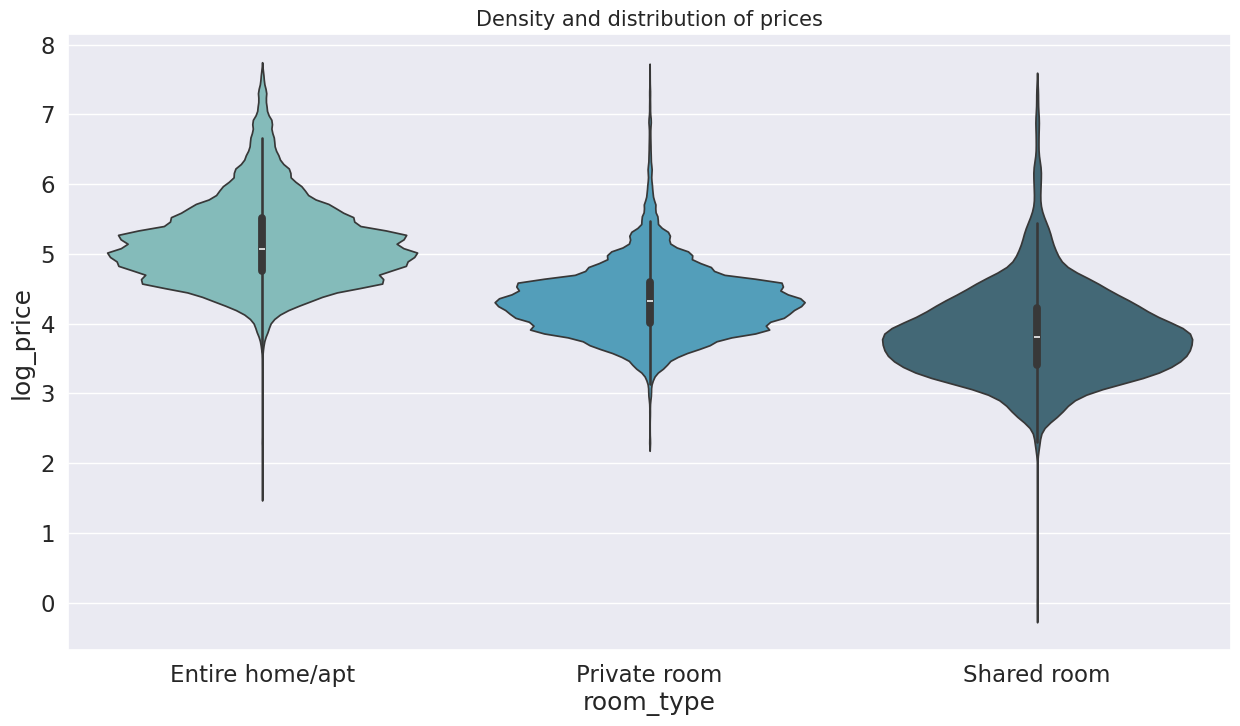

In [267]:
plot_violinplot("room_type","log_price")

<ipython-input-266-4a6c314e4ecc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')


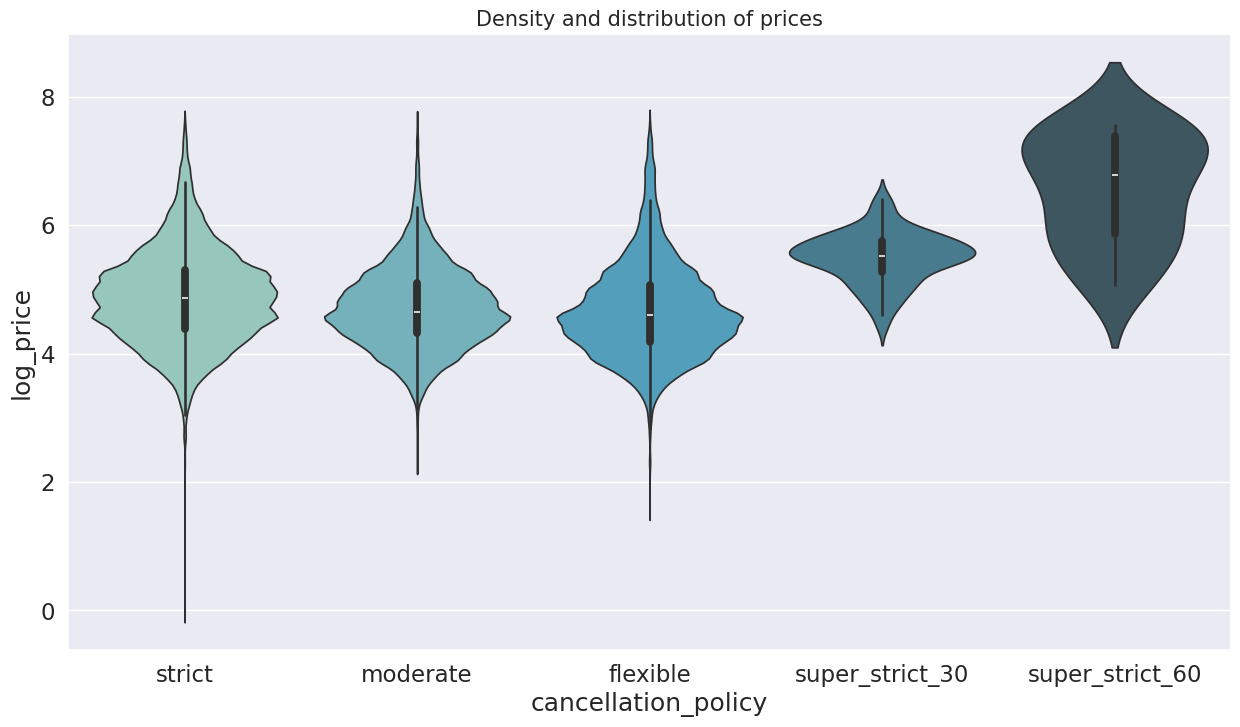

In [268]:
plot_violinplot("cancellation_policy","log_price")

<ipython-input-266-4a6c314e4ecc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')


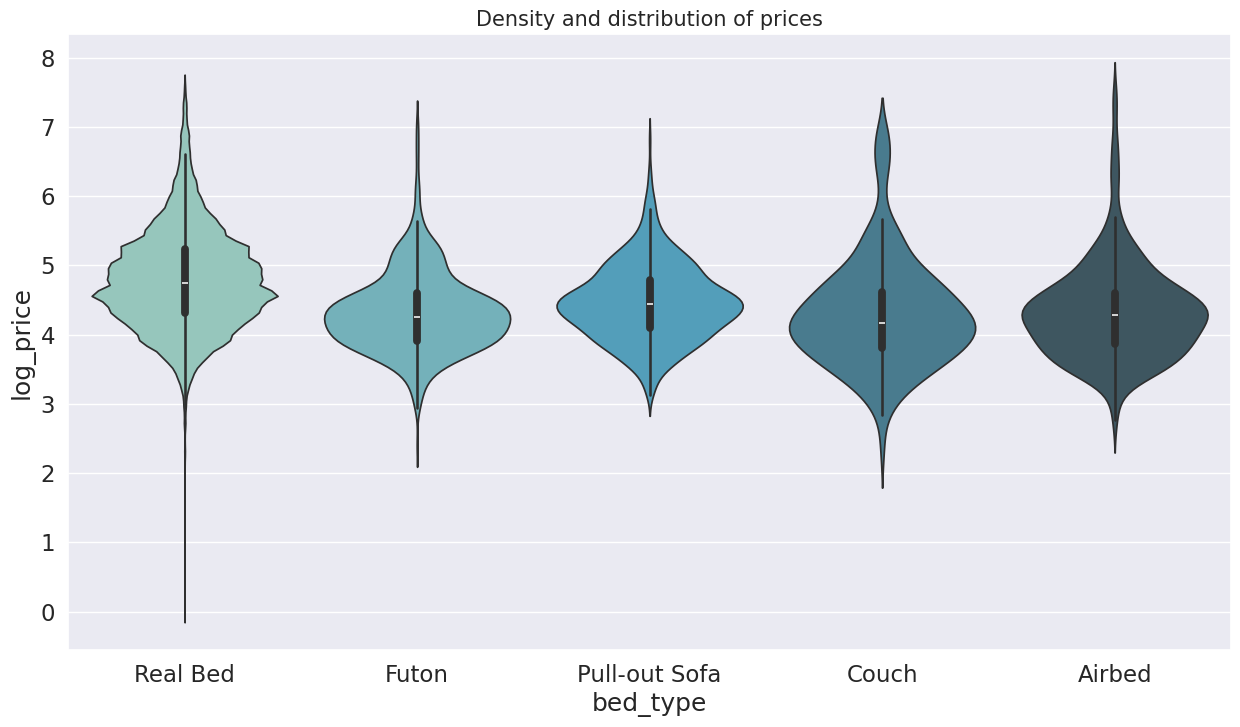

In [269]:
plot_violinplot("bed_type","log_price")

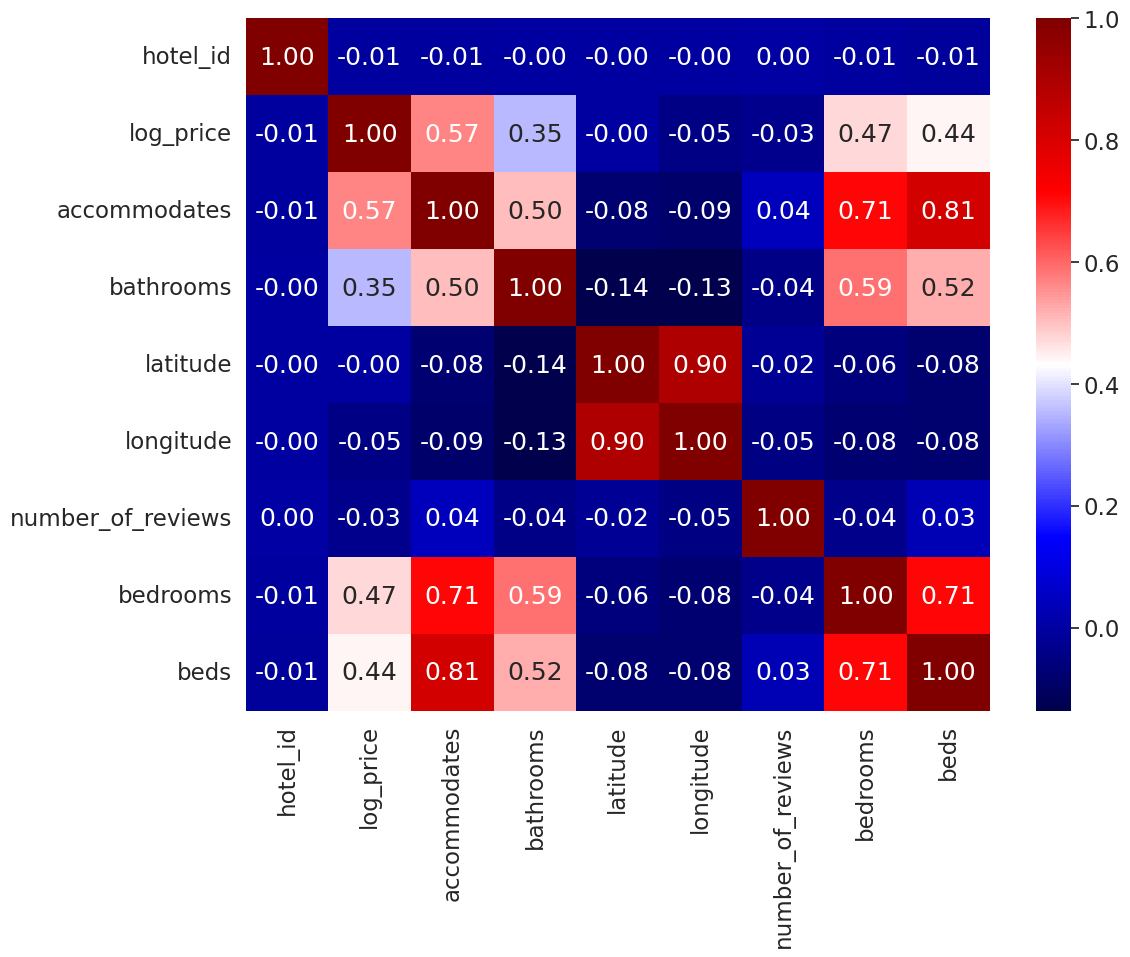

In [270]:
#example: exclude non-numeric columns
numeric_columns =df.select_dtypes(include=['int','float']).columns
df_numeric=df[numeric_columns]

# Plot heatmap of correlations for numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,9))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [271]:
categorical_col = []
for column in df.columns:
   if df[column].dtypes !=  "float64" and df[column].dtypes != "int64":
     categorical_col.append(column)
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'host_identity_verified',
 'host_since',
 'instant_bookable',
 'name',
 'neighbourhood']

In [272]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
print('Before encoding:', df['property_type'].unique())
df['property_type']= le.fit_transform(df['property_type'])
print('After encoding: ', df['property_type'].unique())

Before encoding: ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']
After encoding:  [ 0 17 11 22 29 16 14  1  4 15 12 23  6 33  3 27 19  2 25  8  5 31 28 32
 26 18  7 10 34 13 24 30  9 21 20]


In [273]:
 print('Before encoding:', df['room_type'].unique())
df['room_type'] =le.fit_transform(df['room_type'])
print('After encoding: ',df['room_type'].unique())

Before encoding: ['Entire home/apt' 'Private room' 'Shared room']
After encoding:  [0 1 2]


In [274]:
print('Before encoding:', df['cancellation_policy'].unique())
df['cancellation_policy'] =le.fit_transform(df['cancellation_policy'])
print('After encoding:', df ['cancellation_policy'].unique())

Before encoding: ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']
After encoding: [2 1 0 3 4]


In [275]:
print('Before encoding:', df['cleaning_fee'].unique())
df['cleaning_fee'] =le.fit_transform(df['cleaning_fee'])
print('After encoding:', df ['cleaning_fee'].unique())

Before encoding: [ True False]
After encoding: [1 0]


In [276]:
print('Before encoding:', df['city'].unique())
df['city'] =le.fit_transform(df['city'])
print('After encoding:', df ['city'].unique())

Before encoding: ['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston']
After encoding: [4 5 2 3 1 0]


In [277]:
print('Before encoding:', df['host_identity_verified'].unique())
df['host_identity_verified'] = le.fit_transform(df['host_identity_verified'])
print('After encoding:', df['host_identity_verified'].unique())


Before encoding: ['t' 'f']
After encoding: [1 0]


In [278]:
df.host_identity_verified.fillna(method='ffill', inplace=True)
df.neighbourhood.fillna(method='ffill', inplace=True)
df.bathrooms.fillna(method='ffill', inplace=True)
df.beds.fillna(method='ffill', inplace=True)
df['bedrooms'].fillna(df['bathrooms'].median(), inplace=True)


In [279]:
df.isnull().sum()

hotel_id                    0
log_price                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
host_identity_verified      0
host_since                188
instant_bookable            0
latitude                    0
longitude                   0
name                        0
neighbourhood               0
number_of_reviews           0
bedrooms                    0
beds                        0
dtype: int64

In [280]:
 x=df.iloc[:,[0,2,3,4,7,8,9,11,13,14,15,18,19]]
 x.head(20)

,hotel_id,property_type,room_type,accommodates,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,bedrooms
0,6901257,0,0,3,2,1,4,1,f,40.696524,-73.991617,2,1.0
1,6304928,0,0,7,2,1,4,0,t,40.766115,-73.989040,6,3.0
2,7919400,0,0,5,1,1,4,1,t,40.808110,-73.943756,10,1.0
3,13418779,17,0,4,0,1,5,1,f,37.772004,-122.431619,0,2.0
4,3808709,0,0,2,1,1,2,1,t,38.925627,-77.034596,4,0.0
5,12422935,0,1,2,2,1,5,1,t,37.753164,-122.429526,3,1.0
6,11825529,0,0,3,1,1,3,0,t,33.980454,-118.462821,15,1.0
7,13971273,11,0,2,1,1,3,1,f,34.046737,-118.260439,9,1.0
8,180792,17,1,2,1,1,5,0,f,37.781128,-122.501095,159,1.0
9,5385260,17,1,2,1,1,3,0,t,33.992563,-117.895997,2,1.0


In [281]:
y=df.iloc[:,1]
y.head(20)

0     5.010635
1     5.129899
2     4.976734
3     6.620073
4     4.744932
5     4.442651
6     4.418841
7     4.787492
8     4.787492
9     3.583519
10    4.605170
11    5.010635
12    4.248495
13    5.298317
14    4.955827
15    4.094345
16    4.317488
17    4.595120
18    4.882802
19    4.595120
Name: log_price, dtype: float64

In [282]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,[0,2,3,4,7,8,9,11,13,14,15,18,19]]
y=df.iloc[:,1]
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)
print(x_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55583, 13)
(18528, 13)
(55583,)
(18528,)


In [283]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate random data with matching dimensions
x_train = np.random.rand(55583, 13)
y_train = np.random.rand(55583)
x_test = np.random.rand(18528, 13)
y_test = np.random.rand(18528)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [284]:
# Necessary imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming x_train_scaled, y_train, x_test_scaled, and y_test are already defined

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train_scaled, y_train)

# Predict using the test data
y_pred_lr = lr.predict(x_test_scaled)

# Calculate evaluation metrics
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print('\nMean Absolute Error of Linear Regression:', mae_lr)
print('\nMean Squared Error of Linear Regression:', mse_lr)
print('\nRoot Mean Squared Error of Linear Regression:', rmse_lr)
print('\nR2 Score of Linear Regression:', r2_lr)



Mean Absolute Error of Linear Regression: 0.24838017625953848

Mean Squared Error of Linear Regression: 0.08247848159645457

Root Mean Squared Error of Linear Regression: 0.2871906711515097

R2 Score of Linear Regression: 3.031904205785807e-05


In [285]:
rf=RandomForestRegressor()
rf.fit(x_train_scaled,y_train)
y_pred_rf= rf.predict(x_test_scaled)
mae_rf= metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf= metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf =np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf= metrics.r2_score(y_test, y_pred_rf)
print('\nMean Absolute Error of Random Forest Regressor:',mae_rf)
print('\nMean Squarred Error of Random Forest Regressor :', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor:', rmse_rf)
print('\nR2 Score of Random Forest Regressor :',r2_rf)


Mean Absolute Error of Random Forest Regressor: 0.2495737630163105

Mean Squarred Error of Random Forest Regressor : 0.08377171973931985

Root Mean Squarred Error of Random Forest Regressor: 0.2894334461310922

R2 Score of Random Forest Regressor : -0.015648909140765666


In [242]:
from sklearn.linear_model import Ridge
model=Pipeline([
('poly', PolynomialFeatures()),
('ridge', Ridge(fit_intercept=True))
])
param_grid ={
'poly__degree': [1, 2, 3],
'ridge__alpha': [0.1,0.5,1.0,2.0]
}
#Perform grid search with 5-fold cross-validation
poly_tuned=GridSearchCV(model, param_grid, cv=5)
#Traning and Testing
poly_tuned.fit(x_train_scaled, y_train)
y_pred_poly= poly_tuned.predict(x_test_scaled)
mae_poly= metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly= metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly= np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly= metrics.r2_score(y_test, y_pred_poly)
print('\nMean Absolute Error of Polynomial Regression:',mae_poly)
print('\nMean Squarred Error of Polynomial Regression:',mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression:',rmse_poly)
print('\nR2 Score of Polynomial Regression :',r2_poly)


Mean Absolute Error of Polynomial Regression: 0.2497251323546816

Mean Squarred Error of Polynomial Regression: 0.08304558810606649

Root Mean Squarred Error of Polynomial Regression: 0.2881763142696958

R2 Score of Polynomial Regression : -0.0006234316292446085


In [286]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# Assuming x_train_scaled, x_test_scaled, y_train, y_test are defined and properly scaled

# Initialize GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=10)

# Fit the model
gb.fit(x_train_scaled, y_train)

# Predict using the model
y_pred_gb = gb.predict(x_test_scaled)

# Calculate evaluation metrics
mae_gb = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb = metrics.mean_squared_error(y_test, y_pred_gb)  # Corrected variable name
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb = metrics.r2_score(y_test, y_pred_gb)

# Print the results
print('\nMean Absolute Error of Gradient Boosting:', mae_gb)
print('\nMean Squared Error of Gradient Boosting:', mse_gb)  # Corrected print statement
print('\nRoot Mean Squared Error of Gradient Boosting:', rmse_gb)
print('\nR2 Score of Gradient Boosting:', r2_gb)



Mean Absolute Error of Gradient Boosting: 0.25632832838241654

Mean Squared Error of Gradient Boosting: 0.09008116628495788

Root Mean Squared Error of Gradient Boosting: 0.3001352466555001

R2 Score of Gradient Boosting: -0.0921446826703074


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
import numpy as np
model_CBR = CatBoostRegressor()
model_CBR.fit(x_train_scaled, y_train)
cross_val_score(model_CBR,x_train_scaled, y_train,
scoring='r2',
     cv=KFold(n_splits=5,
     shuffle=True,
     random_state=2022,
))
y_pred_cbr= model_CBR.predict(x_test_scaled)
mae_cbr =metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr =metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr =metrics.r2_score(y_test, y_pred_cbr)
print('\nMean Absolute Error of CatBoost Regressor :',mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor:',mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor:',rmse_cbr)
print('\nR2 Score of CatBoost Regressor:',r2_cbr)

Learning rate set to 0.077247
0:	learn: 0.2887089	total: 12.1ms	remaining: 12.1s
1:	learn: 0.2886801	total: 23.8ms	remaining: 11.9s
2:	learn: 0.2886464	total: 35.7ms	remaining: 11.9s
3:	learn: 0.2885995	total: 47.2ms	remaining: 11.8s
4:	learn: 0.2885679	total: 60.4ms	remaining: 12s
5:	learn: 0.2885357	total: 71.9ms	remaining: 11.9s
6:	learn: 0.2885087	total: 83.2ms	remaining: 11.8s
7:	learn: 0.2884876	total: 94.3ms	remaining: 11.7s
8:	learn: 0.2884598	total: 105ms	remaining: 11.6s
9:	learn: 0.2884238	total: 118ms	remaining: 11.7s
10:	learn: 0.2883938	total: 129ms	remaining: 11.6s
11:	learn: 0.2883678	total: 140ms	remaining: 11.5s
12:	learn: 0.2883388	total: 152ms	remaining: 11.5s
13:	learn: 0.2883185	total: 163ms	remaining: 11.5s
14:	learn: 0.2882990	total: 175ms	remaining: 11.5s
15:	learn: 0.2882775	total: 188ms	remaining: 11.6s
16:	learn: 0.2882442	total: 200ms	remaining: 11.6s
17:	learn: 0.2882108	total: 212ms	remaining: 11.6s
18:	learn: 0.2881748	total: 225ms	remaining: 11.6s
19:	l

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(x_train_scaled, y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
mae_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = metrics.r2_score(y_test, y_pred_xgb)
print('\nMean Absolute Error of XGBoost Regressor:', mae_xgb)
print('\nMean Squared Error of XGBoost Regressor:', mse_xgb)
print('\nRoot Mean Squared Error of XGBoost Regressor:', rmse_xgb)
print('\nR2 Score of XGBoost Regressor:', r2_xgb)


In [ ]:
r2_list={"Linear Regression": r2_lr,
"Random Forest": r2_rf,
"Polynomial Regression":r2_poly,
"Gradient Boosting":r2_gb, "CatBoost":r2_cbr,"XGBoost": r2_xgb}
mae_list={"Linear Regression": mae_lr,
"Random Forest": mae_rf, "Polynomial Regression": mae_poly,
"Gradient Boosting":mae_gb ,"CatBoost": mae_cbr,
"XGBoost" :mae_xgb}
mse_list = {"Linear Regression": mse_lr,
"Random Forest": mse_rf ,"Polynomial Regression":mse_poly,
"Gradient Boosting":mse_gb,
"CatBoost": mse_cbr,
"XGBoost":mse_xgb}
rmse_list ={"Linear Regression":rmse_lr,
"Random Forest": rmse_rf ,"Polynomial Regression":rmse_poly,
"Gradient Boosting":rmse_gb,
"CatBoost": rmse_cbr, "XGBoost":rmse_xgb}
a1 =pd.DataFrame.from_dict(r2_list, orient='index',columns=["R2_SCORE"])
a2= pd.DataFrame.from_dict(mae_list, orient ='index', columns  = ["MEAN ABSOLUTE ERROR"])
a3 =pd.DataFrame.from_dict(mse_list, orient ='index', columns = ["MEAN SQUARRED ERROR"])
a4 =pd.DataFrame.from_dict(rmse_list, orient ='index', columns = ["ROOT MEAN SQUARRED ERROR"])
org=pd.concat([a1,a2,a3,a4],axis=1)
org

In [ ]:
alg= ['LR', 'RF', 'PR', 'GB', 'CBR', 'XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend =["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]
plt.title("METRICS COMPARISION")
plt.legend(legend, loc ='right', fontsize='xx-small')
plt.show()

In [ ]:
import pickle
# Use r prefix to create a raw string
pickle.dump(model_CBR, open(r'C:\Users\akula\OneDrive\Desktop\cbr.pkl', 'wb'))

In [ ]:
import pickle
import numpy as np  # Import numpy for array manipulation (if not already imported)

# Load the model from the pickle file
file_path = r'C:\Users\akula\OneDrive\Desktop\cbr.pkl'
model = pickle.load(open(file_path, 'rb'))  # Use 'rb' for read binary mode

# Example prediction using the loaded model
input_data = np.array([[180792, 17, 1, 2, 1, 1, 5, 0, 0, 37.781128, -122.501095, 159, 1.0]])  # Convert to numpy array if not already
prediction = model.predict(input_data)

# Print the prediction
print(prediction)


In [ ]:
import pickle
import numpy as np  # Import numpy for array manipulation (if not already imported)

# Load the model from the pickle file
file_path = r'C:\Users\akula\OneDrive\Desktop\cbr.pkl'
model = pickle.load(open(file_path, 'rb'))  # Use 'rb' for read binary mode

# Example prediction using the loaded model
input_data = np.array([[18224863,17,0,8,2,1,4,0,1,40.643733,-73.950855,5,3]])  # Convert to numpy array if not already
prediction = model.predict(input_data)

# Print the prediction
print(prediction)
